In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import functools
import numpy as np
from numpy.random import RandomState
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

TRAIN_DATA_URL = "./data/test/specific/output_1.csv"
# TEST_DATA_URL = "./data/test/auckland/data.csv"

def difference(a, b):
        return round((a - b) / ((a + b) / 2) * 100, 2)

# read and import the data


In [8]:
#df = df.drop(['address', 'owners', 'suburb', 'town', 'ta_name', 'property_type', 'sale_date', 'listing_date', 'provisional_sale_price', 'provisional_sale_date', 'building_age', 'capital_value', 'rem', 'rem2'], axis=1)
df = pd.read_csv(TRAIN_DATA_URL, thousands=',', header = 0)
df = df.drop(["Job Code", "Valuation Date", "Existing/New", "Lot", "Street No.", "Street Name", "Locality", "Type", "Land Value $", "New Rate $", "Outdoor Areas", "OIs", "OBs", "Chattels $", "Rent", "Comments"], axis=1)
df = df[df['Land Area'] != 'Unit Title']
df = df[df['Land Area'] != 'Cross Lease']

df['Beds'] = df['Beds'].astype('float')
df['Land Area'] = df['Land Area'].astype('float')

df['Market Value $'] = df['Market Value $'].str.replace('$', '')
df['Market Value $'] = df['Market Value $'].str.replace(',', '')
df['Market Value $'] = df['Market Value $'].astype('float')


In [9]:
train = df

X = train.drop('Market Value $', axis = 1)
y = train['Market Value $']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
#scaler = MinMaxScaler()

X_save = X_test

#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

model = tf.keras.models.load_model('hpp.h5') 

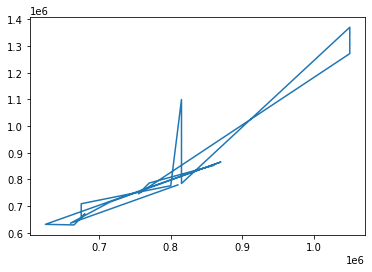

In [16]:
predictions = model.predict(X_test)
values = y_test.values

#print(predictions)
#predictions.cumsum()
#values.cumsum()

#plt.plot(values, predictions, label='Actual')
#plt.plot(predictions, [200000,400000,600000,800000,1000000], label='Prediction')
#plt.show()

total = 0
itterations = 0

smallest = float('inf')
largest = 0



In [11]:
# output
for i in range(0, 17):
        print('\n')
        print('\n')

        print('----[ PREDICTION ]----')
        print('\n')

        difference_ = difference(values[i], predictions[i][0])

        print('actual value: ', values[i])
        print('prediction:   ', predictions[i][0])
        print('\n')
        print('difference:   ', difference_, "%")

        if abs(difference_) < smallest:
                smallest = abs(difference_)
        elif abs(difference_) > largest:
                largest = abs(difference_)

        total += abs(difference_)
        itterations += 1

        print('\n')
        print(X_save.iloc[[i]])
        print('\n')

print("\n\n\nRESULTS: ")
print("Average Difference:  ", round(total / itterations, 2), "% \n")
print("Largest Difference:  ", round(largest, 2), "%")
print("Smallest Difference: ", round(smallest, 2), "%\n\n\n")





----[ PREDICTION ]----


actual value:  810000.0
prediction:    779556.0955834953


difference:    3.83 %


    Beds  Land Area  Living Area  grade  garage        long        lat
12   3.0      154.0        121.0      1       1  174.868107 -36.873063






----[ PREDICTION ]----


actual value:  660000.0
prediction:    635962.2301535156


difference:    3.71 %


    Beds  Land Area  Living Area  grade  garage        long        lat
17   2.0      101.0         85.2      2       1  174.864168 -36.891141






----[ PREDICTION ]----


actual value:  715000.0
prediction:    715071.4143764573


difference:    -0.01 %


   Beds  Land Area  Living Area  grade  garage       long        lat
6   2.0      138.0         97.0      1       1  174.86732 -36.872953






----[ PREDICTION ]----


actual value:  870000.0
prediction:    865407.1568849683


difference:    0.53 %


    Beds  Land Area  Living Area  grade  garage        long        lat
36   4.0      194.0        131.3      2       1  174